In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.api.optimizers import Adam
from keras import layers, models, utils, losses
from keras.api.utils import image_dataset_from_directory
from PIL import Image
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2024-11-16 13:38:29.345696: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-16 13:38:29.354013: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-16 13:38:29.363150: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-16 13:38:29.365996: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-16 13:38:29.373299: I tensorflow/core/platform/cpu_feature_guar

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(13, activation='softmax')
])

In [4]:
%run ETL.ipynb

252
Found 252 files belonging to 13 classes.
Using 202 files for training.


I0000 00:00:1731760722.421932  225108 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731760722.422084  225108 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731760722.422171  225108 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731760722.481089  225108 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Found 252 files belonging to 13 classes.
Using 50 files for validation.
<_RebatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
3232


In [5]:
print(next(iter(train_ds)))

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[0.32589257, 0.33835658, 0.32051146],
         [0.36603135, 0.38246828, 0.36398652],
         [0.3017544 , 0.29541504, 0.2933881 ],
         ...,
         [0.33649215, 0.3571689 , 0.34606287],
         [0.39675307, 0.40679893, 0.39805558],
         [0.42718306, 0.42845124, 0.42133436]],

        [[0.4167666 , 0.42923066, 0.41297466],
         [0.25157434, 0.264445  , 0.24451782],
         [0.3091598 , 0.2902596 , 0.282726  ],
         ...,
         [0.356695  , 0.37433314, 0.36365125],
         [0.42361057, 0.4360808 , 0.42420295],
         [0.4165152 , 0.42499393, 0.41204047]],

        [[0.29099303, 0.30345708, 0.28561193],
         [0.27117193, 0.27654374, 0.25730914],
         [0.31343997, 0.27843818, 0.26802045],
         ...,
         [0.39937893, 0.41092113, 0.40123147],
         [0.43354282, 0.44600686, 0.43108556],
         [0.46173498, 0.47658274, 0.45740086]],

        ...,

        [[0.41069552, 0.4215704 

In [6]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=losses.sparse_categorical_crossentropy,
)

In [7]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
)

Epoch 1/20


I0000 00:00:1731760749.768814  225266 service.cc:146] XLA service 0x7c3cc00050f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731760749.768840  225266 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-11-16 13:39:09.783001: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-16 13:39:09.859102: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-11-16 13:39:09.881579: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility

     14/Unknown 5s 12ms/step - loss: 2.6234

I0000 00:00:1731760751.559320  225266 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


     98/Unknown 6s 12ms/step - loss: 2.5346

2024-11-16 13:39:12.743020: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-16 13:39:12.743045: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-11-16 13:39:12.743053: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15290855233893850926
2024-11-16 13:39:12.743062: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15550091560525018970
/home/hugo/miniconda3/envs/tf/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.

101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 2.5316 - val_loss: 262.9523
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 2.3325 - val_loss: 401.3815
Epoch 3/20


2024-11-16 13:39:17.335564: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-11-16 13:39:17.335595: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15290855233893850926
2024-11-16 13:39:17.335607: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15550091560525018970


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 2.1112 - val_loss: 504.3813
Epoch 4/20


2024-11-16 13:39:20.907675: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15290855233893850926
2024-11-16 13:39:20.907710: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15550091560525018970


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1.7975 - val_loss: 697.6309
Epoch 5/20


2024-11-16 13:39:24.440312: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-11-16 13:39:24.440343: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15290855233893850926
2024-11-16 13:39:24.440356: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15550091560525018970


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1.3302 - val_loss: 794.4016
Epoch 6/20


2024-11-16 13:39:27.942199: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15290855233893850926
2024-11-16 13:39:27.942237: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15550091560525018970


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1.2185 - val_loss: 808.1345
Epoch 7/20


2024-11-16 13:39:31.452198: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15290855233893850926
2024-11-16 13:39:31.452231: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15550091560525018970


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.8523 - val_loss: 929.7946
Epoch 8/20


2024-11-16 13:39:35.056292: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15290855233893850926
2024-11-16 13:39:35.056331: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15550091560525018970


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.7217 - val_loss: 1226.9816
Epoch 9/20


2024-11-16 13:39:38.597930: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-11-16 13:39:38.597964: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15290855233893850926
2024-11-16 13:39:38.597976: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15550091560525018970


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.5965 - val_loss: 1274.0734
Epoch 10/20


2024-11-16 13:39:42.096854: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15290855233893850926
2024-11-16 13:39:42.096880: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15550091560525018970


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.6109 - val_loss: 1578.4001
Epoch 11/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.5074 - val_loss: 1668.2755
Epoch 12/20


2024-11-16 13:39:49.192604: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15290855233893850926
2024-11-16 13:39:49.192639: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15550091560525018970


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3138 - val_loss: 1632.1835
Epoch 13/20


2024-11-16 13:39:52.722059: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15290855233893850926
2024-11-16 13:39:52.722094: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15550091560525018970


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3626 - val_loss: 1767.2756
Epoch 14/20


2024-11-16 13:39:56.288964: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15290855233893850926
2024-11-16 13:39:56.288987: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15550091560525018970


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3532 - val_loss: 1990.7482
Epoch 15/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3277 - val_loss: 2352.1907
Epoch 16/20


2024-11-16 13:40:03.361572: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15290855233893850926
2024-11-16 13:40:03.361611: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15550091560525018970


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.2972 - val_loss: 2596.5083
Epoch 17/20


2024-11-16 13:40:06.877598: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-11-16 13:40:06.877630: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15290855233893850926
2024-11-16 13:40:06.877643: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15550091560525018970


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2647 - val_loss: 2514.5000
Epoch 18/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.2523 - val_loss: 2583.3027
Epoch 19/20


2024-11-16 13:40:13.946726: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15290855233893850926
2024-11-16 13:40:13.946757: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15550091560525018970


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.2202 - val_loss: 2927.5784
Epoch 20/20


2024-11-16 13:40:17.571891: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15290855233893850926
2024-11-16 13:40:17.571927: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15550091560525018970


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.2811 - val_loss: 2600.7173


2024-11-16 13:40:21.135415: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15290855233893850926
2024-11-16 13:40:21.135447: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15550091560525018970


/tmp/ipykernel_222138/878362657.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


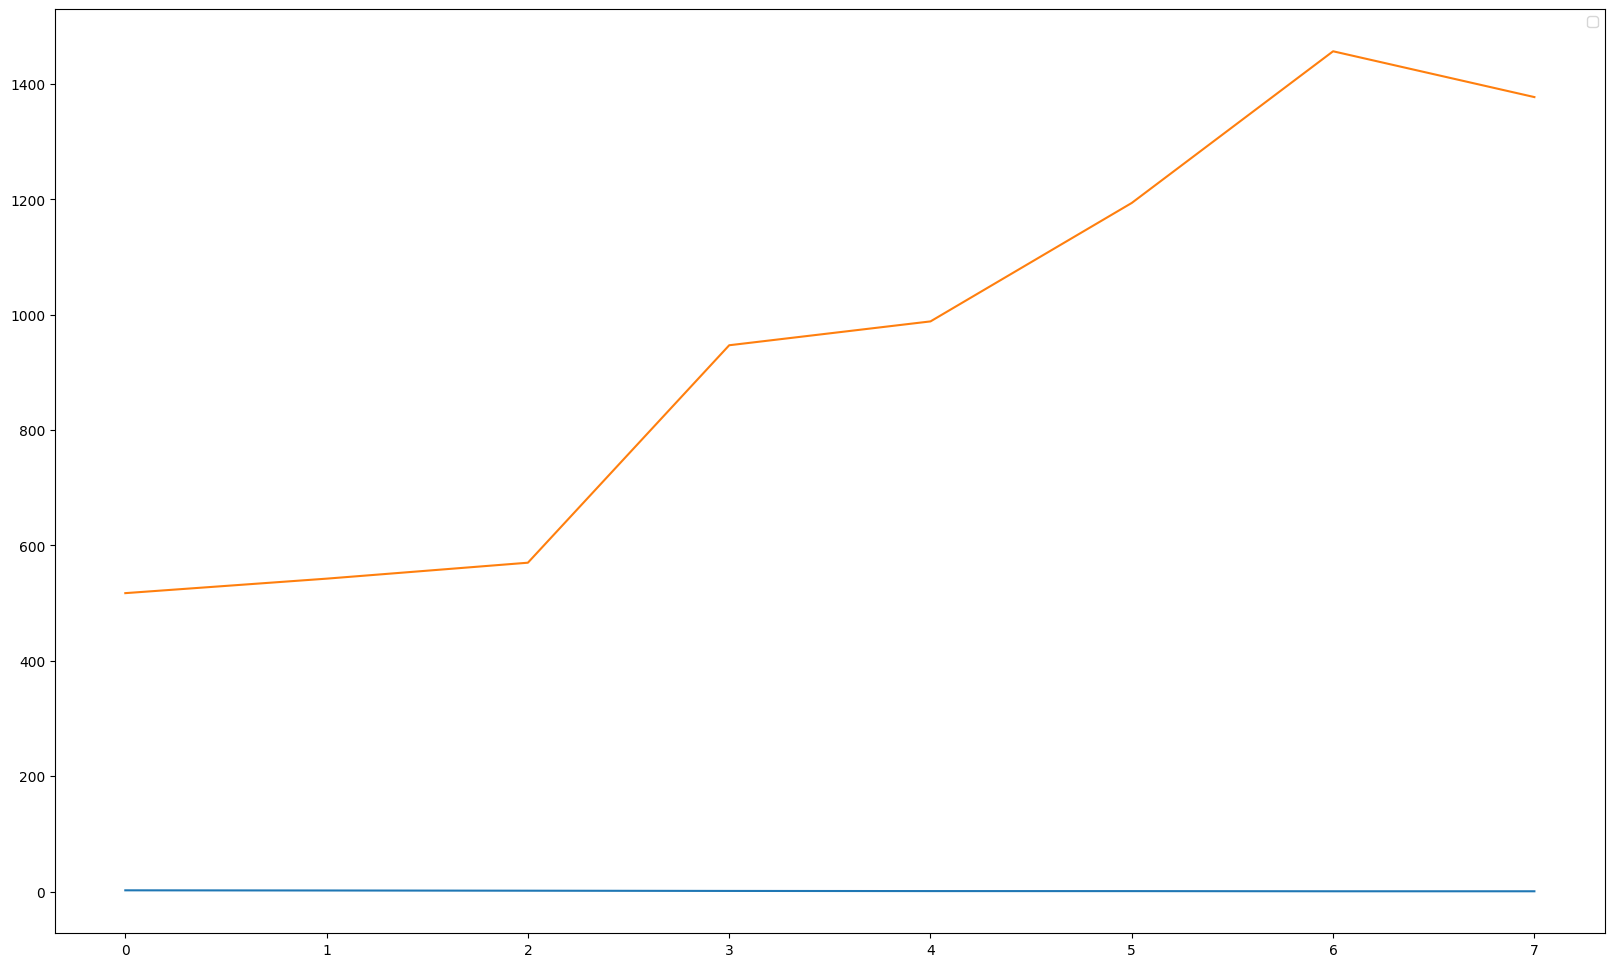

In [8]:
plt.figure(figsize=(20,12))
plt.plot(history.history["loss"][2:10])
plt.plot(history.history["val_loss"][2:10])
plt.legend()

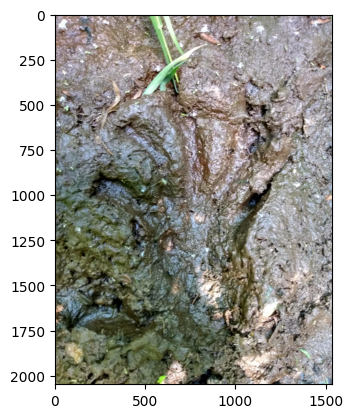

In [9]:
plt.imshow(Image.open("/home/shared/Mammiferes/Castor/original.jpeg"))

In [10]:
castor = tf.io.read_file("/home/shared/Mammiferes/Castor/original.jpeg")
castor = tf.image.decode_jpeg(castor, channels=3)
resized_castor = tf.image.resize(castor, [256,256], method="bilinear")

In [11]:
input = tf.expand_dims(
    resized_castor,
    axis = 0
)

In [12]:
input.shape

TensorShape([1, 256, 256, 3])

In [13]:
model.predict(input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [14]:
next(iter(val_ds))[0].shape

TensorShape([32, 256, 256, 3])

In [15]:
class_names = train_ds.class_names
print(class_names)

AttributeError: '_RebatchDataset' object has no attribute 'class_names'

NameError: name 'class_names' is not defined

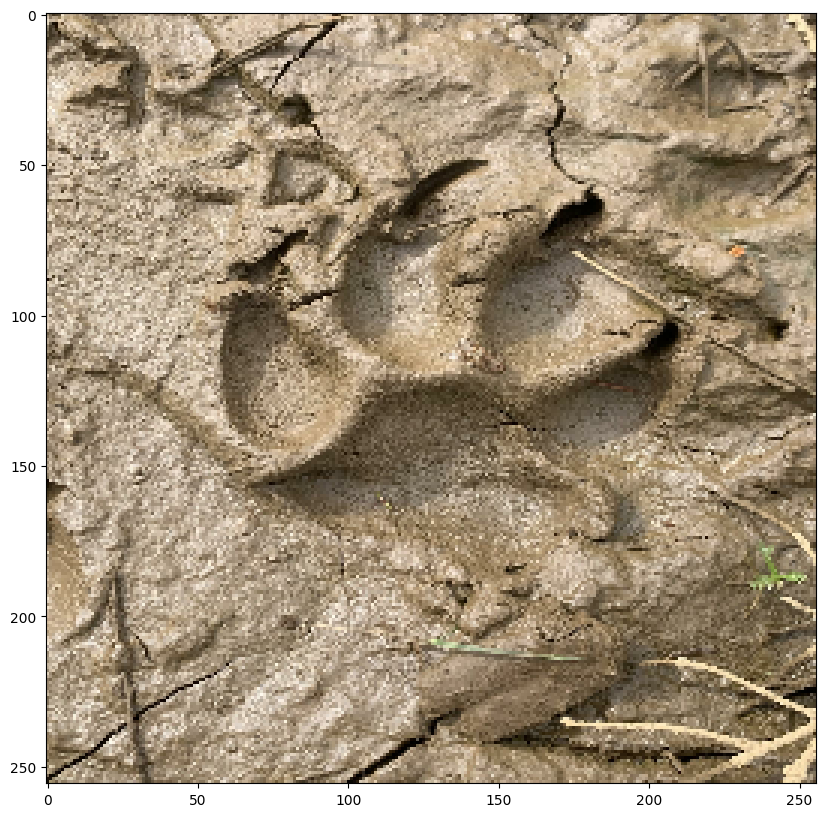

In [16]:
plt.figure(figsize=(10, 10))
batch,_ = val_ds.take(3)
plt.imshow(batch[0][1].numpy().astype("uint8"))
plt.title(class_names[batch[1][1]])
plt.axis("off")
